In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

In [53]:
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv(".\\DATA\\Telco-Customer-Churn.csv")

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df = df.set_index("customerID")

In [12]:
for col in df:
    print(f"{col}:")
    print(df[col].unique())

gender:
['Female' 'Male']
SeniorCitizen:
[0 1]
Partner:
['Yes' 'No']
Dependents:
['No' 'Yes']
tenure:
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:
['No' 'Yes']
MultipleLines:
['No phone service' 'No' 'Yes']
InternetService:
['DSL' 'Fiber optic' 'No']
OnlineSecurity:
['No' 'Yes' 'No internet service']
OnlineBackup:
['Yes' 'No' 'No internet service']
DeviceProtection:
['No' 'Yes' 'No internet service']
TechSupport:
['No' 'Yes' 'No internet service']
StreamingTV:
['No' 'Yes' 'No internet service']
StreamingMovies:
['No' 'Yes' 'No internet service']
Contract:
['Month-to-month' 'One year' 'Two year']
PaperlessBilling:
['Yes' 'No']
PaymentMethod:
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:

In [16]:
df.describe().transpose().drop("tenure")

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [17]:
df_dummies = pd.get_dummies(data=df)

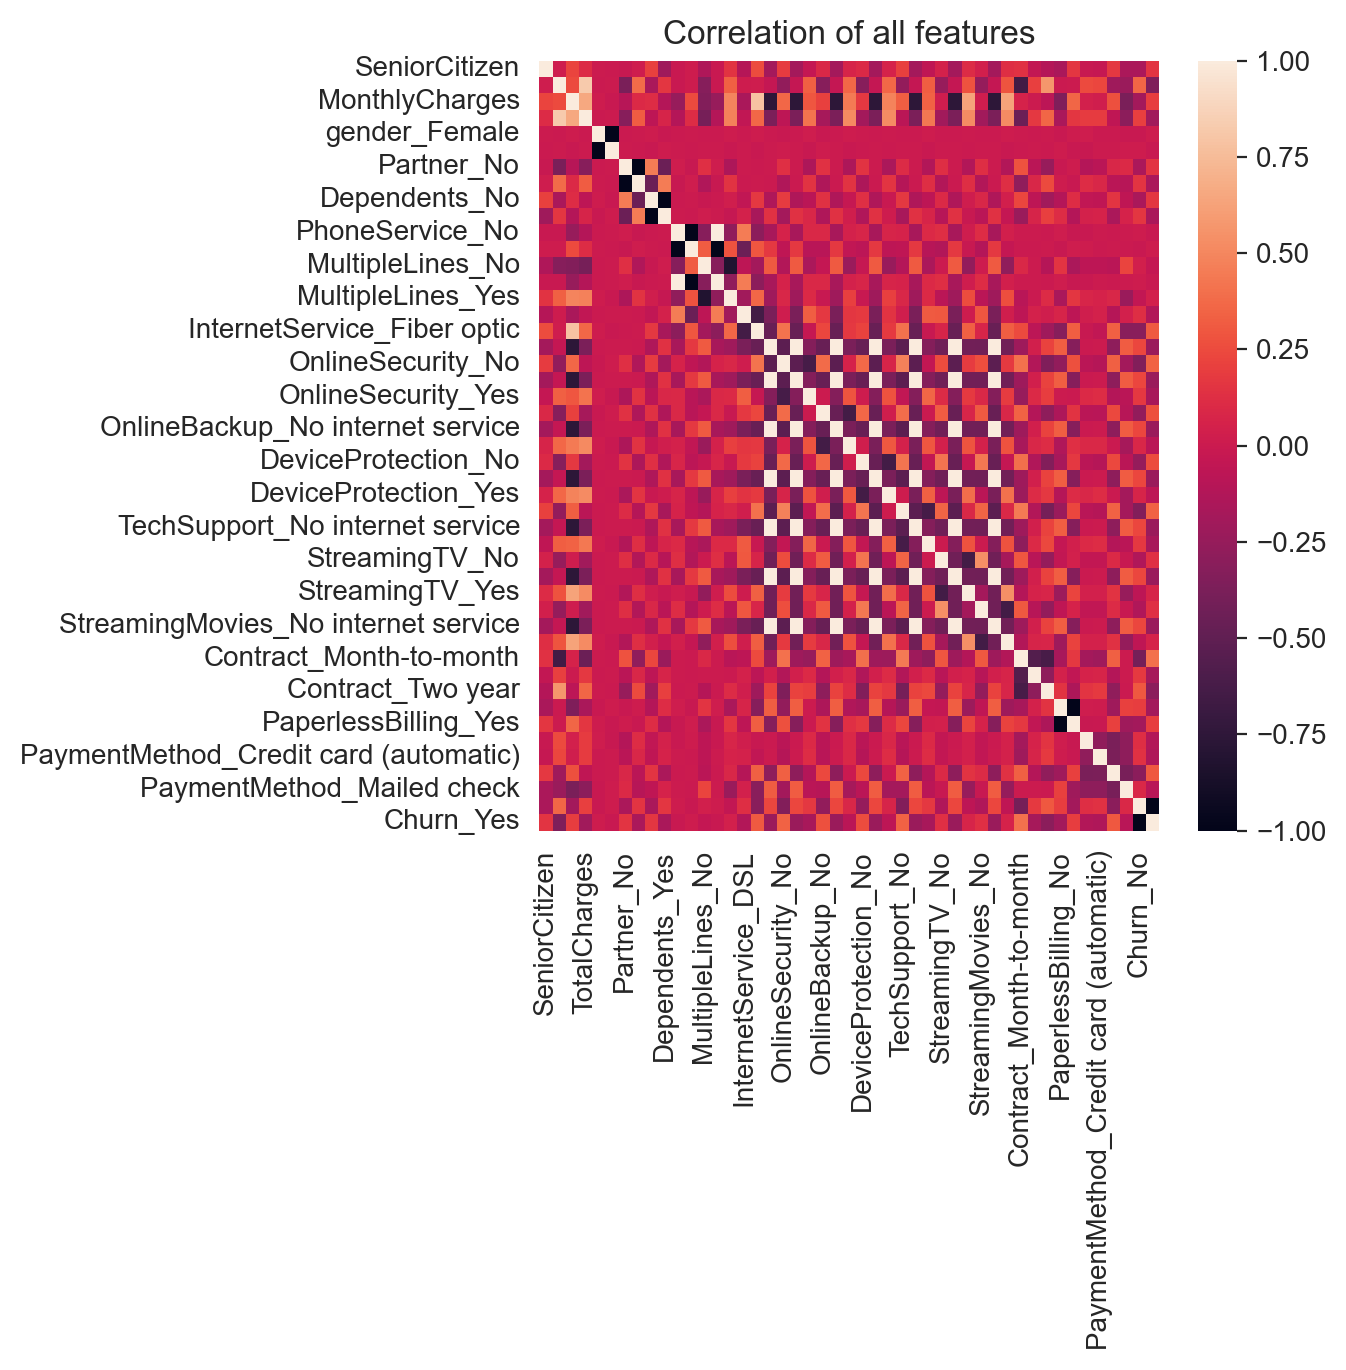

In [28]:
plt.figure(figsize=(5,5), dpi=200)
sns.heatmap(data=df_dummies.corr())
plt.title("Correlation of all features");

In [18]:
correlations_to_yes = df_dummies.corr()[["Churn_Yes"]].sort_values("Churn_Yes")

In [23]:
correlations = pd.DataFrame(data=correlations_to_yes, index=correlations_to_yes.index)
correlations = correlations.drop(["Churn_Yes", "Churn_No"])

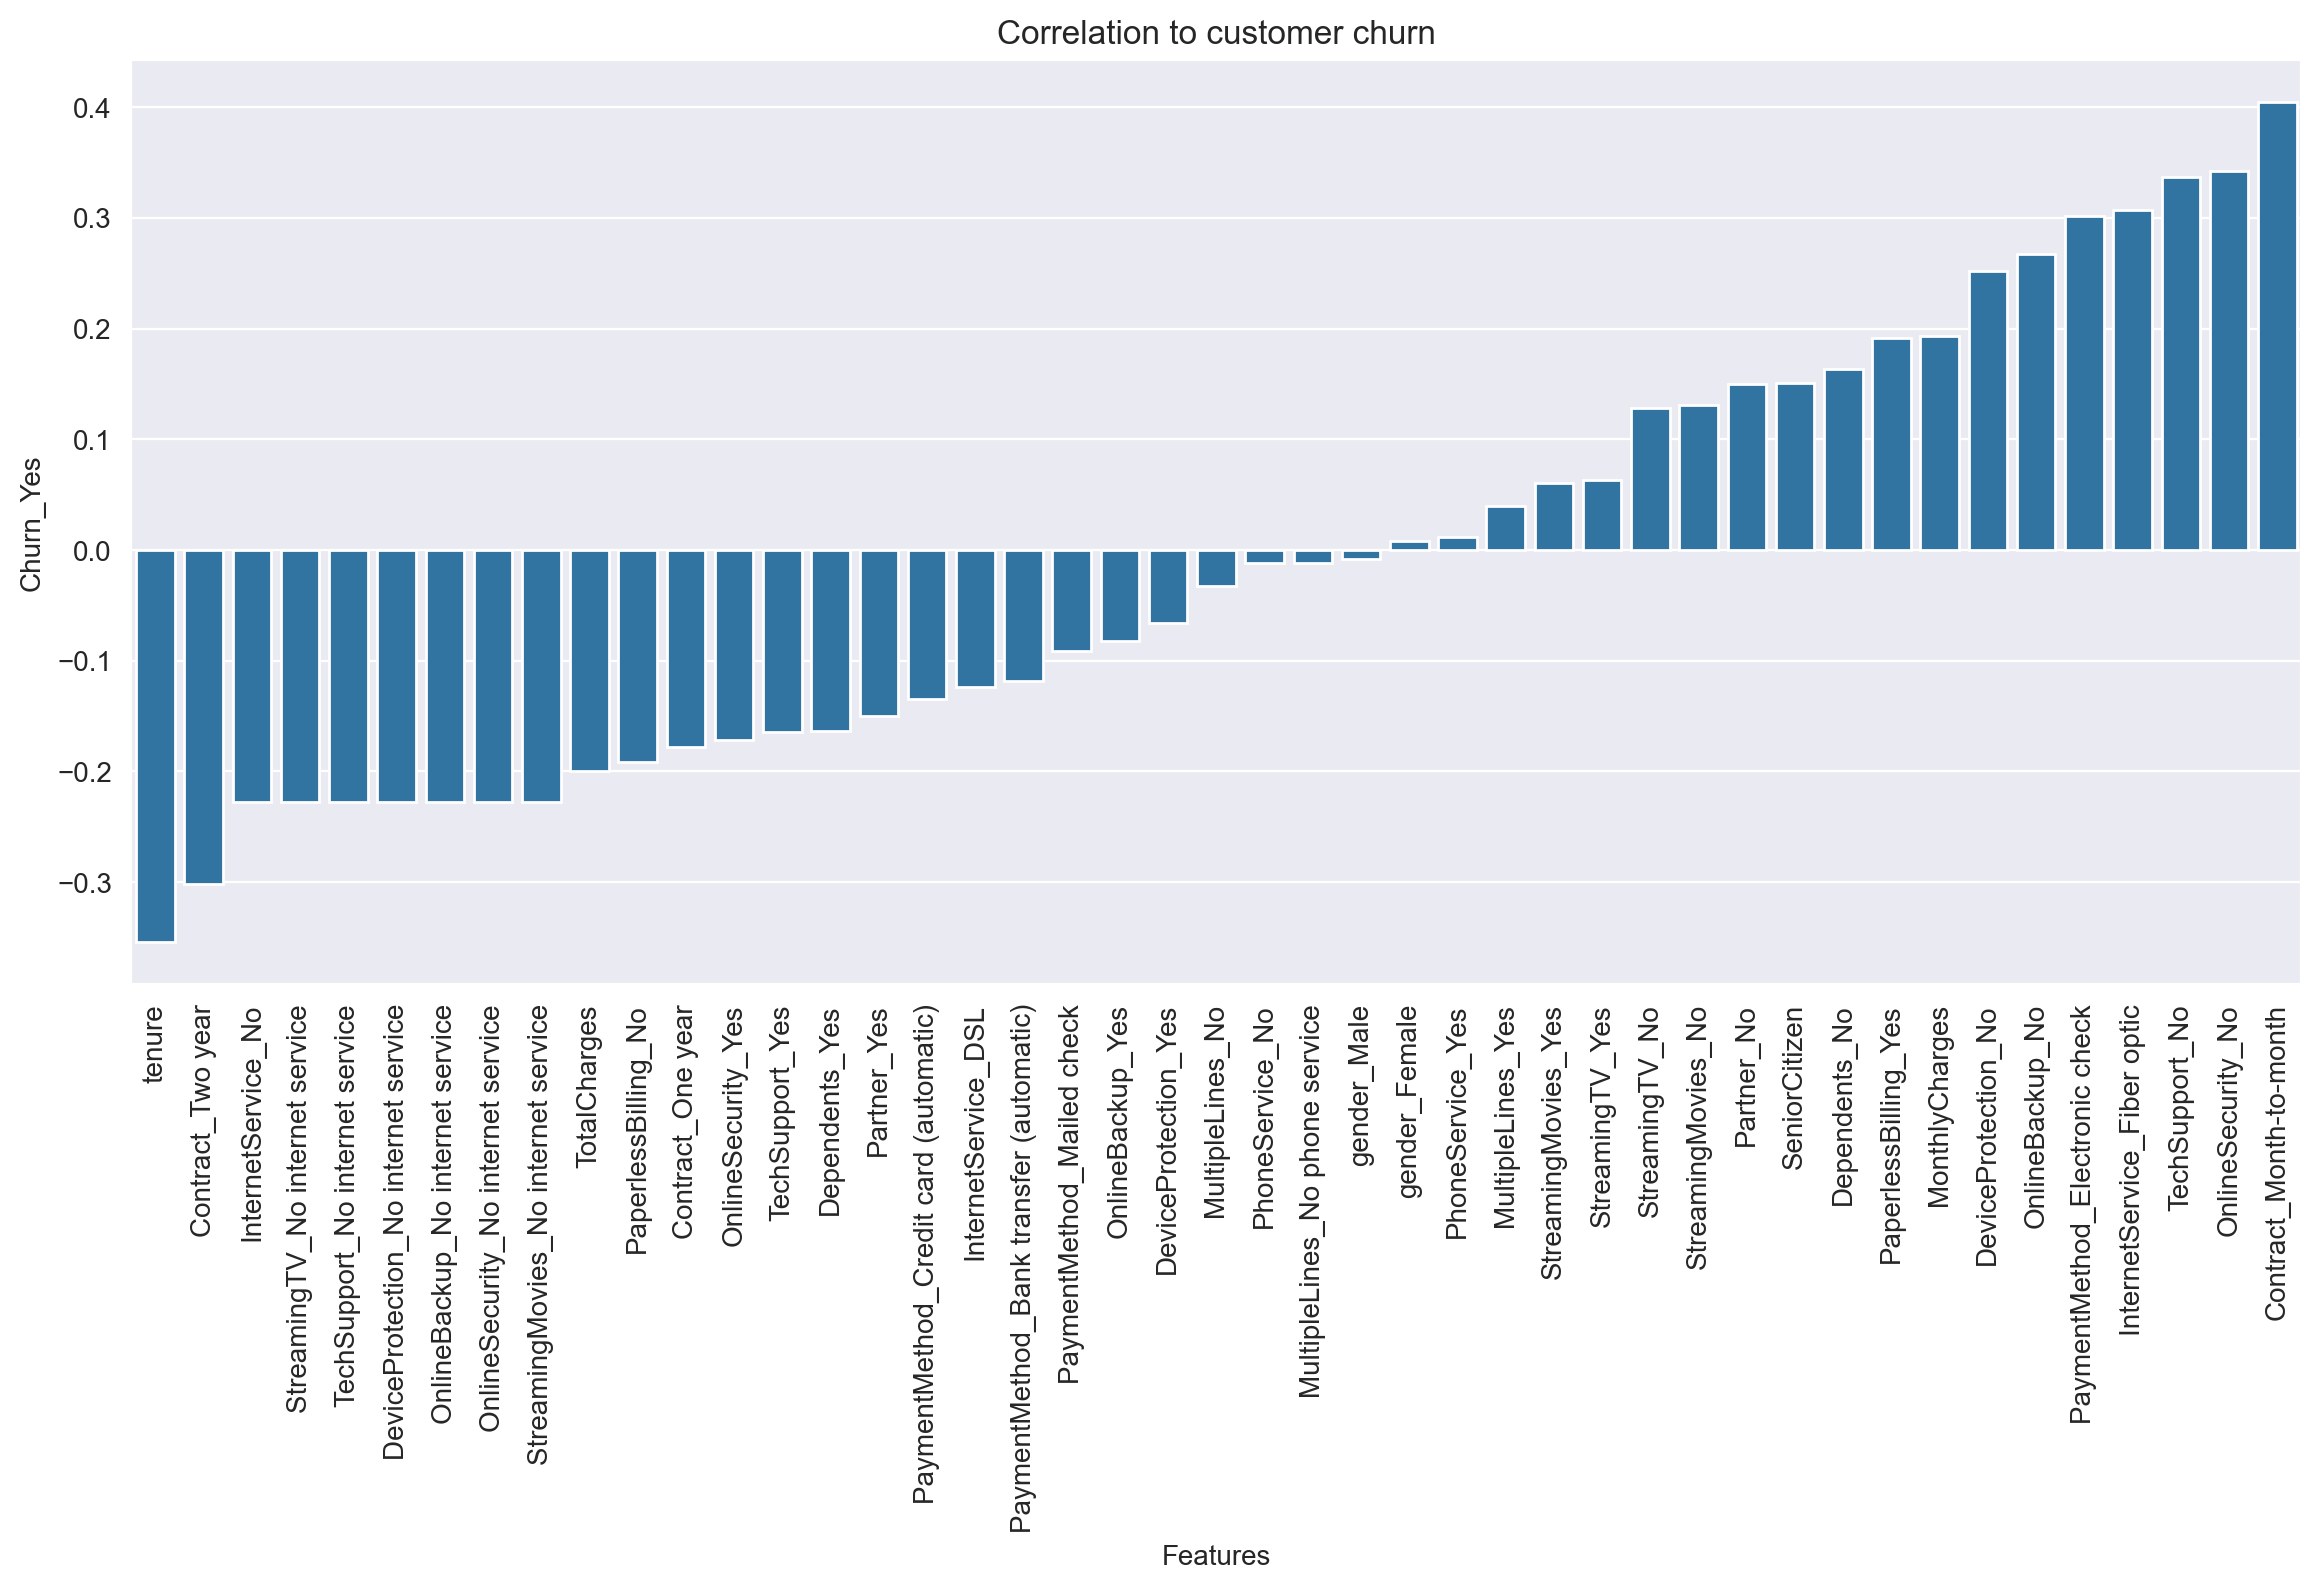

In [21]:
plt.figure(figsize=(14,6), dpi=200)
sns.barplot(data=correlations, x=correlations.index, y="Churn_Yes")
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.title("Correlation to customer churn");

Contract type and tenure analysis

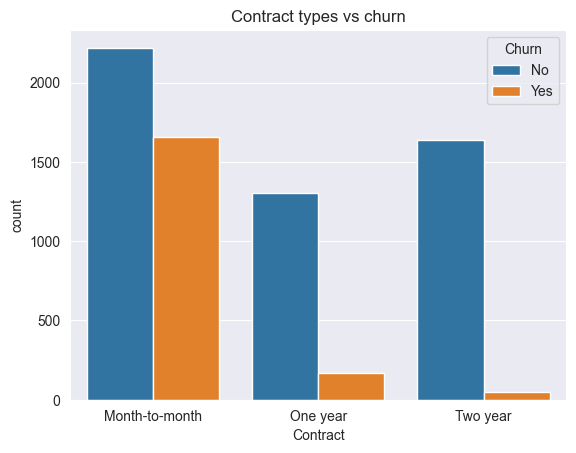

In [33]:
sns.countplot(data=df, x="Contract", hue="Churn")
plt.title("Contract types vs churn");

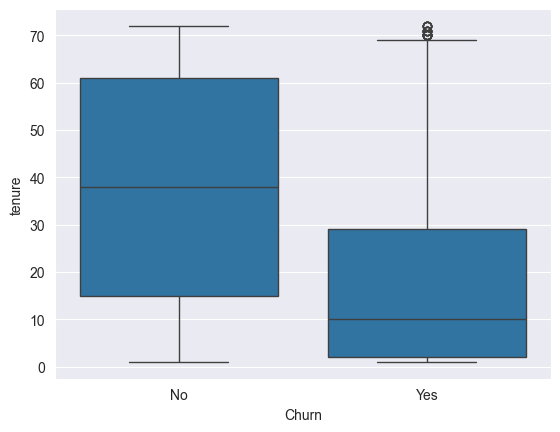

In [60]:
sns.boxplot(data=df, x="Churn", y="tenure");

<Figure size 1600x800 with 0 Axes>

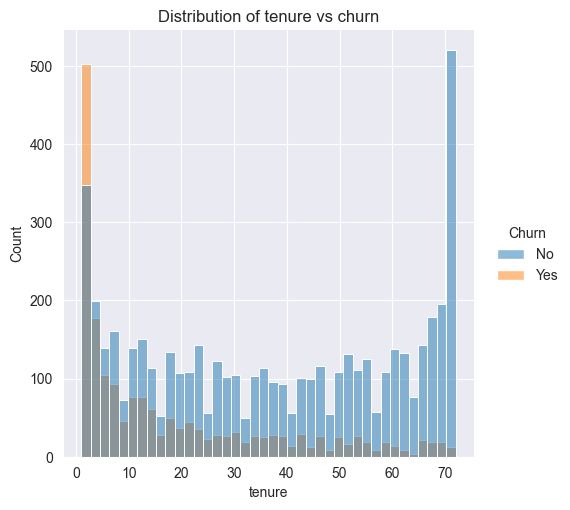

In [55]:
plt.figure(figsize=(8,4), dpi=200)
sns.displot(data=df, x="tenure", bins=40, hue="Churn")
plt.title("Distribution of tenure vs churn");

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1800x1000 with 0 Axes>

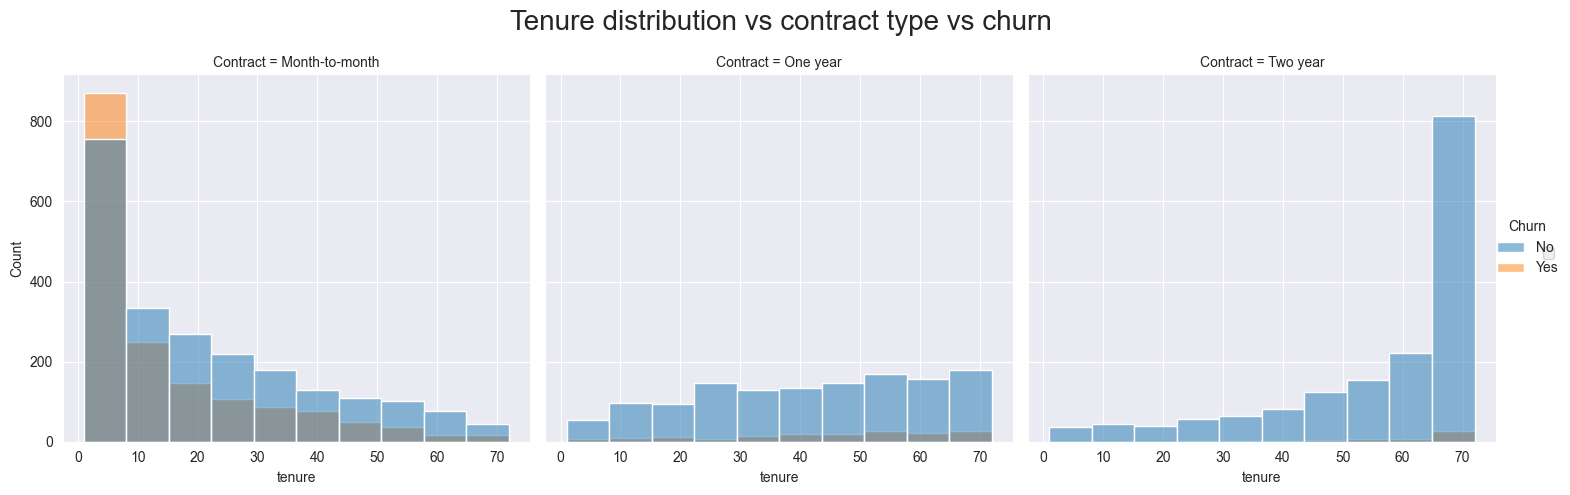

In [69]:
plt.figure(figsize=(9,5), dpi=200)
sns.displot(data=df, x="tenure", col="Contract", bins=10, hue="Churn")
plt.suptitle("Tenure distribution vs contract type vs churn", size=20)
plt.legend(loc=(1.1,.5))
plt.tight_layout();

In [61]:
No_Churn =  df.groupby(["Churn", "tenure"]).count().transpose()["No"]
Yes_Churn = df.groupby(["Churn", "tenure"]).count().transpose()["Yes"]
percentage = 100*(Yes_Churn/(Yes_Churn+No_Churn))

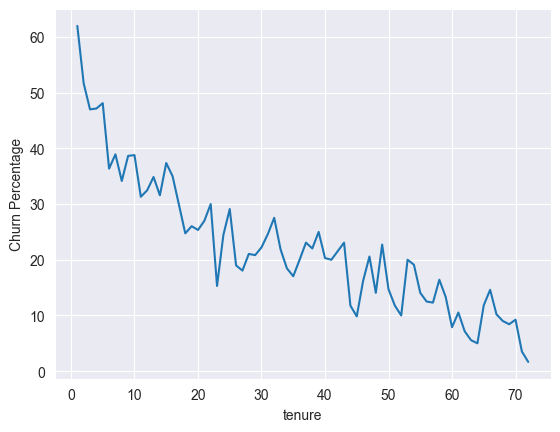

In [63]:
plt.plot(np.arange(1,73), percentage.iloc[0])
plt.ylabel("Churn Percentage")
plt.xlabel("tenure");

In [64]:
def cohort(tenure):
    if tenure <= 12:
        return "0-12 Months"
    elif 12 < tenure < 24:
        return "12-24 Months"
    elif 24 <= tenure <= 48:
        return "24-48 Months"
    else:
        return "Over 48 Months"

In [65]:
df["Tenure Cohort"] = df["tenure"].apply(lambda x: cohort(x))

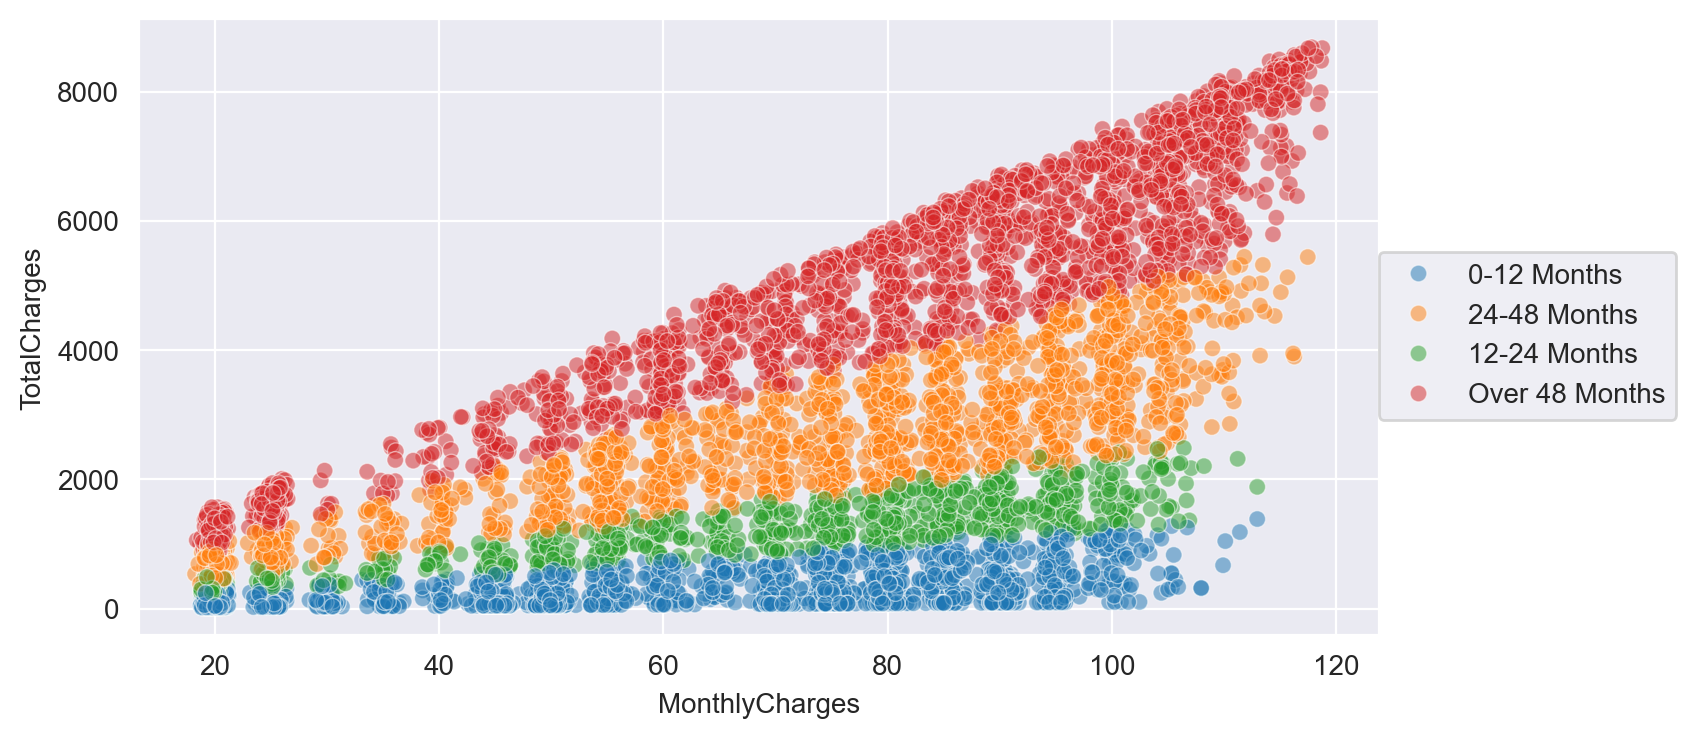

In [74]:
plt.figure(figsize=(8,4), dpi=200)
sns.scatterplot(data=df, x="MonthlyCharges", y="TotalCharges", alpha=0.5, hue="Tenure Cohort")
plt.legend(loc=(1,.35))